In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import callbacks
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
print("Training set:")
for content in os.listdir("/content/drive/My Drive/pneumonia_detection_1/pneumonia-detection/train"):
    print(str(len(os.listdir("/content/drive/My Drive/pneumonia_detection_1/pneumonia-detection/train/"+content))),content,"images.")

print("Validation set:")
for content in os.listdir("/content/drive/My Drive/pneumonia_detection_1/pneumonia-detection/validation"):
    print(str(len(os.listdir("/content/drive/My Drive/pneumonia_detection_1/pneumonia-detection/validation/"+content))),content,"images.")


print("Test set:")
for content in os.listdir("/content/drive/My Drive/pneumonia_detection_1/pneumonia-detection/test"):
    print(str(len(os.listdir("/content/drive/My Drive/pneumonia_detection_1/pneumonia-detection/test/"+content))),content,"images.")

Training set:
2288 Bacterial Pneumonia images.
1199 Normal images.
1196 Viral Pneumonia images.
Validation set:
151 Viral Pneumonia images.
250 Bacterial Pneumonia images.
150 Normal images.
Test set:
242 Bacterial Pneumonia images.
234 Normal images.
149 Viral Pneumonia images.


In [ ]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=30,
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.15,
                                    horizontal_flip=True,
                                    fill_mode="nearest"
                                    )


# data_generator = ImageDataGenerator(rescale=1./255)

data_generat = ImageDataGenerator(rescale=1./255)

train_gen = data_generator.flow_from_directory("/content/drive/My Drive/pneumonia_detection_1/pneumonia-detection/train",
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               class_mode="categorical",
                                               batch_size=32,
                                               shuffle=True)

val_gen = data_generat.flow_from_directory("/content/drive/My Drive/pneumonia_detection_1/pneumonia-detection/validation",
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               class_mode="categorical",
                                               batch_size=32)

test_gen = data_generat.flow_from_directory("/content/drive/My Drive/pneumonia_detection_1/pneumonia-detection/test",
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               class_mode="categorical",
                                               batch_size=32)

Found 4682 images belonging to 3 classes.
Found 550 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [ ]:
print(train_gen.class_indices, test_gen.class_indices, val_gen.class_indices)

{'Bacterial Pneumonia': 0, 'Normal': 1, 'Viral Pneumonia': 2} {'Bacterial Pneumonia': 0, 'Normal': 1, 'Viral Pneumonia': 2} {'Bacterial Pneumonia': 0, 'Normal': 1, 'Viral Pneumonia': 2}


In [ ]:
from tensorflow.keras.layers import Flatten
resnet = tf.keras.applications.resnet.ResNet101(input_shape=(256,256,3), weights='imagenet', include_top=False)
x = Flatten()(resnet.output)
x = Dense(512 ,activation='relu')(x)
x = Dense(64 ,activation='relu')(x)
prediction = Dense(3 ,activation='softmax')(x),
model = Model(inputs=resnet.input, outputs=prediction)

for layer in resnet.layers:
    layer.trainable = False

171450368/171446536 [==============================] - 2s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
class CustomSaver(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch == 19 or epoch==39 or epoch==49:  # or save after some epoch, each k-th epoch etc.
            count = epoch+1
            self.model.save("/content/drive/My Drive/pneumonia_resnet101_aug/model_epoch_{}_loss_{}.h5".format(count, logs["loss"]))
            print("\nEpoch {} over. Saving model".format(count))

model_saver = CustomSaver()

In [ ]:
r = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=[model_saver]
)

Epoch 1/50
147/147 [==============================] - 1301s 9s/step - loss: 3.0328 - accuracy: 0.4859 - val_loss: 3.0791 - val_accuracy: 0.2891
Epoch 2/50
147/147 [==============================] - 166s 1s/step - loss: 1.5199 - accuracy: 0.5254 - val_loss: 0.9917 - val_accuracy: 0.5491
Epoch 3/50
147/147 [==============================] - 166s 1s/step - loss: 1.2175 - accuracy: 0.5355 - val_loss: 1.0692 - val_accuracy: 0.4218
Epoch 4/50
147/147 [==============================] - 166s 1s/step - loss: 0.9890 - accuracy: 0.5942 - val_loss: 0.8463 - val_accuracy: 0.5600
Epoch 5/50
147/147 [==============================] - 166s 1s/step - loss: 0.8836 - accuracy: 0.5980 - val_loss: 0.7384 - val_accuracy: 0.6418
Epoch 6/50
147/147 [==============================] - 166s 1s/step - loss: 0.8749 - accuracy: 0.6256 - val_loss: 0.7845 - val_accuracy: 0.6473
Epoch 7/50
147/147 [==============================] - 165s 1s/step - loss: 0.9242 - accuracy: 0.5931 - val_loss: 0.7539 - val_accuracy: 0.683

In [ ]:
model_50 = load_model("/content/drive/My Drive/pneumonia_resnet101_aug/model_epoch_50_loss_0.7044059038162231.h5")

In [ ]:
model_40 = load_model("/content/drive/My Drive/pneumonia_resnet101_aug/model_epoch_40_loss_0.7178491950035095.h5")

In [ ]:
model_50.evaluate(test_gen)

20/20 [==============================] - 7s 326ms/step - loss: 0.6901 - accuracy: 0.7660


[0.6900656819343567, 0.7660256624221802]

In [ ]:
model_40.evaluate(test_gen)

20/20 [==============================] - 192s 10s/step - loss: 0.8621 - accuracy: 0.6458


[0.8621034026145935, 0.6458333134651184]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.zeros([624,])
y_test_full = np.zeros([624,])
for i in range(0, 20):
  (x_test, y_test) = test_gen[i]
  Y_pred = model_50.predict(x_test)
  y_test_full[32*i:32*i+32] = np.argmax(y_test, axis=1)
  y_pred[32*i:32*i+32] = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_full, y_pred)
print('Classification Report')
target_names = ['Bacterial Pneumonia', 'Normal', 'Viral Pneumonia']
print(classification_report(y_test_full, y_pred, target_names=target_names))

Confusion Matrix
Classification Report
                     precision    recall  f1-score   support

Bacterial Pneumonia       0.79      0.82      0.80       242
             Normal       0.75      0.82      0.79       234
    Viral Pneumonia       0.74      0.59      0.65       148

           accuracy                           0.77       624
          macro avg       0.76      0.74      0.75       624
       weighted avg       0.76      0.77      0.76       624



In [ ]:
print(train_gen.class_indices)
print(val_gen.class_indices)
print(test_gen.class_indices)
# print(train_gen.classes)
# print(val_gen.classes)
print(test_gen.classes)

{'Bacterial Pneumonia': 0, 'Normal': 1, 'Viral Pneumonia': 2}
{'Bacterial Pneumonia': 0, 'Normal': 1, 'Viral Pneumonia': 2}
{'Bacterial Pneumonia': 0, 'Normal': 1, 'Viral Pneumonia': 2}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
model = load_model("/content/drive/My Drive/pneumonia_resnet101_aug/model_epoch_50_loss_0.7044059038162231.h5")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
Y_pred = model.predict(test_gen)
Y_pred = np.array(Y_pred)
Y_pred = Y_pred.reshape((624,3))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_gen.classes, y_pred))
print('Classification Report')
target_names = ['Bacterial Pneumonia', 'Normal', 'Viral Pneumonia']
print(classification_report(test_gen.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 91 104  47]
 [ 90 105  39]
 [ 69  47  32]]
Classification Report
                     precision    recall  f1-score   support

Bacterial Pneumonia       0.36      0.38      0.37       242
             Normal       0.41      0.45      0.43       234
    Viral Pneumonia       0.27      0.22      0.24       148

           accuracy                           0.37       624
          macro avg       0.35      0.35      0.35       624
       weighted avg       0.36      0.37      0.36       624



In [ ]:
Y_pred.shape

(624, 3)

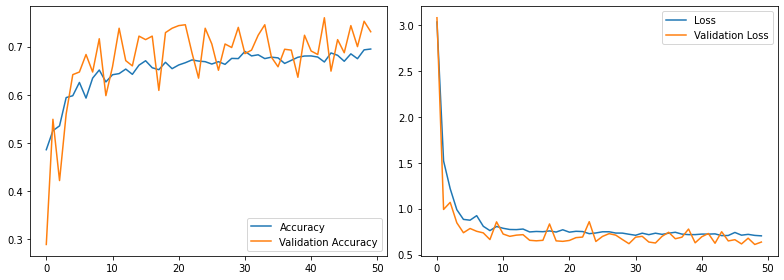

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,4))
axes[0].plot(r.history['accuracy'], label='Accuracy')
axes[0].plot(r.history['val_accuracy'], label='Validation Accuracy')
axes[0].legend()
#plt.show()
axes[1].plot(r.history['loss'], label='Loss')
axes[1].plot(r.history['val_loss'], label='Validation Loss')
axes[1].legend()
fig.tight_layout()

In [ ]:
accuracy = r.history['accuracy']
loss = r.history['loss']
val_accuracy = r.history['val_accuracy']
val_loss = r.history['val_loss']

In [ ]:
accuracy

[0.48590347170829773,
 0.5254164934158325,
 0.5354549288749695,
 0.5941905379295349,
 0.5980350375175476,
 0.6255873441696167,
 0.5931226015090942,
 0.6345579028129578,
 0.6514310240745544,
 0.6266552805900574,
 0.6416061520576477,
 0.6439555883407593,
 0.6533532738685608,
 0.6424604654312134,
 0.6614694595336914,
 0.6706535816192627,
 0.6561298370361328,
 0.6520717740058899,
 0.6674498319625854,
 0.6542075872421265,
 0.6618966460227966,
 0.666595458984375,
 0.6723622679710388,
 0.6700128316879272,
 0.6687313318252563,
 0.663818895816803,
 0.6687313318252563,
 0.6631781458854675,
 0.6755660176277161,
 0.6751388311386108,
 0.6900897026062012,
 0.6806920170783997,
 0.6830414533615112,
 0.6751388311386108,
 0.6781290173530579,
 0.676633894443512,
 0.6651003956794739,
 0.6715078949928284,
 0.6779153943061829,
 0.6804784536361694,
 0.6806920170783997,
 0.6783425807952881,
 0.6680905818939209,
 0.6868859529495239,
 0.6819735169410706,
 0.669585645198822,
 0.6849637031555176,
 0.6749252676963

In [ ]:
loss

[3.0327906608581543,
 1.5198649168014526,
 1.2175387144088745,
 0.9890176057815552,
 0.8835972547531128,
 0.8748606443405151,
 0.9241876006126404,
 0.8084126710891724,
 0.7615094184875488,
 0.8063968420028687,
 0.7867058515548706,
 0.7735403776168823,
 0.7722216248512268,
 0.7785233855247498,
 0.7469313740730286,
 0.7521395683288574,
 0.7495357990264893,
 0.758056104183197,
 0.7456070780754089,
 0.7705860137939453,
 0.7444141507148743,
 0.7540133595466614,
 0.7512255907058716,
 0.7279265522956848,
 0.7357409000396729,
 0.7485927939414978,
 0.7488924264907837,
 0.7348591089248657,
 0.7341324687004089,
 0.7219148874282837,
 0.7106977701187134,
 0.7333807349205017,
 0.7171859741210938,
 0.7332618236541748,
 0.7205409407615662,
 0.7332994937896729,
 0.7433229684829712,
 0.7233263850212097,
 0.7176511883735657,
 0.7178491950035095,
 0.7234010696411133,
 0.7232454419136047,
 0.7259101271629333,
 0.7068213820457458,
 0.7083387970924377,
 0.741364061832428,
 0.7116442322731018,
 0.720672369003

In [ ]:
val_accuracy

[0.2890909016132355,
 0.5490909218788147,
 0.42181816697120667,
 0.5600000023841858,
 0.6418181657791138,
 0.6472727060317993,
 0.6836363673210144,
 0.6472727060317993,
 0.7163636088371277,
 0.5981818437576294,
 0.6581818461418152,
 0.7381818294525146,
 0.6709091067314148,
 0.6600000262260437,
 0.721818208694458,
 0.7145454287528992,
 0.721818208694458,
 0.6090909242630005,
 0.7290909290313721,
 0.7381818294525146,
 0.7436363697052002,
 0.7454545497894287,
 0.6872727274894714,
 0.6345454454421997,
 0.7381818294525146,
 0.7054545283317566,
 0.6509090662002563,
 0.7054545283317566,
 0.6981818079948425,
 0.7400000095367432,
 0.6854545474052429,
 0.692727267742157,
 0.7236363887786865,
 0.7454545497894287,
 0.6781818270683289,
 0.6581818461418152,
 0.6945454478263855,
 0.692727267742157,
 0.6363636255264282,
 0.7236363887786865,
 0.6909090876579285,
 0.6836363673210144,
 0.7599999904632568,
 0.6490908861160278,
 0.7145454287528992,
 0.6872727274894714,
 0.7436363697052002,
 0.6999999880790

In [ ]:
val_loss

[3.0791072845458984,
 0.991743266582489,
 1.069204568862915,
 0.8463345170021057,
 0.7384243011474609,
 0.7845495343208313,
 0.7539387345314026,
 0.7366737127304077,
 0.6641096472740173,
 0.8565673232078552,
 0.7241212129592896,
 0.6990783214569092,
 0.7121178507804871,
 0.71720951795578,
 0.6559828519821167,
 0.6503252387046814,
 0.6557604074478149,
 0.8338934779167175,
 0.6497613787651062,
 0.6444305181503296,
 0.6542251706123352,
 0.6850069165229797,
 0.6911810040473938,
 0.858589768409729,
 0.6431591510772705,
 0.6980972290039062,
 0.7283324003219604,
 0.7123700976371765,
 0.6648681163787842,
 0.6189035177230835,
 0.6898806095123291,
 0.6993023753166199,
 0.6370419859886169,
 0.6264604330062866,
 0.6991211771965027,
 0.7431870102882385,
 0.6728854179382324,
 0.6896829009056091,
 0.7783536911010742,
 0.6287256479263306,
 0.6946448087692261,
 0.7298659086227417,
 0.6238246560096741,
 0.7491973042488098,
 0.6491391658782959,
 0.6623744964599609,
 0.6164805293083191,
 0.678777456283569

In [ ]:
print(len(accuracy),len(loss),len(val_accuracy),len(val_loss))

50 50 50 50


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='ResNet101 with augmentation',
                          cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.savefig("resnet_with_aug_50_epoch.png")
  plt.show()


Confusion matrix, without normalization
[[198  39   5]
 [ 15 193  26]
 [ 37  24  87]]


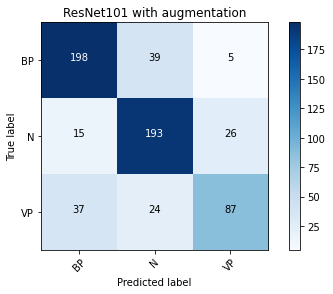

In [ ]:
# cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, ['BP','N', 'VP'])